In [1]:
%matplotlib inline

In [7]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import vaex
import pandas as pd
import dask
import dask.dataframe as dd
import numpy as np
import multiprocessing

In [3]:
%%bash 
python -V

Python 3.7.2


In [4]:
for m in [vaex, dask, pd]:
    print(m.__name__, "->", m.__version__)

vaex -> 1.0.0-beta.6
dask -> 1.2.0
pandas -> 0.24.2


In [6]:
# file_id = "0B8gjQokMGa4nTXc0Z3QyYjZBMWc"
# dest_path = "./data/nyc_taxi2015.hdf5"
# gdd.download_file_from_google_drive(file_id=file_id, dest_path=dest_path)

In [7]:
%%bash 
du -h data/nyc_taxi2015.hdf5

23G	data/nyc_taxi2015.hdf5


In [8]:
file = "./data/nyc_taxi2015.hdf5"

In [17]:
%%time
df = vaex.open("./data/nyc_taxi2015.hdf5")

CPU times: user 5.28 ms, sys: 923 µs, total: 6.2 ms
Wall time: 5.88 ms


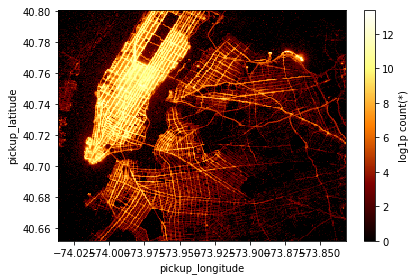

In [16]:
df.plot(df.col.pickup_longitude, df.col.pickup_latitude, f="log1p", show=True, limits="96%");

In [18]:
%%time
df

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 16.9 µs


#,VendorID,dropoff_dayofweek,dropoff_hour,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_dayofweek,pickup_hour,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,2,3.0,19.0,40.75061798095703,-73.97478485107422,1.0,12.0,0.3,0.5,1,1,3.0,19.0,40.7501106262207,-73.993896484375,3.25,0.0,17.05,2015-01-15 19:23:42,2015-01-15 19:05:39,1.59
1,1,5.0,20.0,40.75910949707031,-73.99441528320312,0.5,14.5,0.3,0.5,1,1,5.0,20.0,40.7242431640625,-74.00164794921875,2.0,0.0,17.8,2015-01-10 20:53:28,2015-01-10 20:33:38,3.3
2,1,5.0,20.0,40.82441329956055,-73.95182037353516,0.5,9.5,0.3,0.5,1,2,5.0,20.0,40.80278778076172,-73.96334075927734,0.0,0.0,10.8,2015-01-10 20:43:41,2015-01-10 20:33:38,1.8
3,1,5.0,20.0,40.71998596191406,-74.00432586669923,0.5,3.5,0.3,0.5,1,2,5.0,20.0,40.71381759643555,-74.00908660888672,0.0,0.0,4.8,2015-01-10 20:35:31,2015-01-10 20:33:39,0.5
4,1,5.0,20.0,40.742652893066406,-74.00418090820312,0.5,15.0,0.3,0.5,1,2,5.0,20.0,40.762428283691406,-73.97117614746094,0.0,0.0,16.3,2015-01-10 20:52:58,2015-01-10 20:33:39,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,984",2,4.0,0.0,40.722469329833984,-73.98621368408203,0.5,7.5,0.3,0.5,5,1,3.0,23.0,40.72087097167969,-73.99381256103516,1.76,0.0,10.56,2016-01-01 00:08:18,2015-12-31 23:59:56,1.2
"146,112,985",1,4.0,0.0,40.75238800048828,-73.93951416015625,0.5,7.5,0.3,0.5,2,2,3.0,23.0,40.76028060913085,-73.96527099609375,0.0,0.0,8.8,2016-01-01 00:05:19,2015-12-31 23:59:58,2.0
"146,112,986",1,4.0,0.0,40.69329833984375,-73.9886703491211,0.5,13.5,0.3,0.5,2,2,3.0,23.0,40.73907852172852,-73.98729705810547,0.0,0.0,14.8,2016-01-01 00:12:55,2015-12-31 23:59:59,3.8
"146,112,987",2,4.0,0.0,40.705322265625,-74.01712036132812,0.5,8.5,0.3,0.5,1,2,3.0,23.0,40.72569274902344,-73.99755859375,0.0,0.0,9.8,2016-01-01 00:10:26,2015-12-31 23:59:59,1.96


In [19]:
import vaex
df = vaex.example()
df

#,E,FeH,L,Lz,random_index,vx,vy,vz,x,y,z
0,-121238.171875,-2.309227609164518,831.0799560546875,-336.426513671875,1511648,53.276722,288.386047,-95.2649078,-0.777470767,2.10626292,1.93743467
1,-100819.9140625,-1.788735491591229,1435.1839599609375,-828.7567749023438,2728665,252.810791,-69.9498444,-56.3121033,3.77427316,2.23387194,3.76209331
2,-100559.9609375,-0.7618109022478798,1039.2989501953125,920.802490234375,1202632,96.276474,226.440201,-34.7527161,1.3757627,-6.3283844,2.63250017
3,-70174.8515625,-1.5208778422936413,2441.724853515625,1183.5899658203125,1020502,204.968842,-205.679016,-58.9777031,-7.06737804,1.31737781,-6.10543537
4,-144138.75,-2.655341358427361,374.8164367675781,-314.5353088378906,3154816,-311.742371,-238.41217,186.824127,0.243441463,-0.822781682,-0.206593871
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",-119687.3203125,-1.6499842518381402,746.8833618164062,-508.96484375,1919483,107.432999,-2.13771296,17.5130272,3.76883793,4.66251659,-4.42904139
"329,996",-68933.8046875,-1.4336036247720836,2395.633056640625,1275.490234375,1064141,32.0,108.089264,179.060638,9.17409325,-8.87091351,-8.61707687
"329,997",-112580.359375,-1.9306227597361942,1182.436279296875,115.58557891845703,374845,8.46711349,-38.2765236,-127.541473,-1.14041007,-8.4957695,2.25749826
"329,998",-74862.90625,-1.225019818838568,1324.5926513671875,1057.017333984375,425745,110.221558,-31.3925591,86.2726822,-14.2985935,-5.51750422,-8.65472317


In [20]:
df.x

Expression = x
Length: 330,000 dtype: float64 (column)
---------------------------------------
     0  -0.777471
     1    3.77427
     2    1.37576
     3   -7.06738
     4   0.243441
       ...       
329995    3.76884
329996    9.17409
329997   -1.14041
329998   -14.2986
329999    10.5451

In [23]:
df.evaluate(df.x)

array([ -0.77747077,   3.77427316,   1.3757627 , ...,  -1.14041007,
       -14.2985935 ,  10.5450506 ])

In [24]:
df.select(df.x < 0)
df.evaluate(df.x, selection=True)

array([ -0.77747077,  -7.06737804,  -5.17174435, ...,  -1.87310386,
        -1.14041007, -14.2985935 ])

In [26]:
df_negative = df[df.x < 0]
df_negative[['x', 'y', 'z']]

#,x,y,z
0,-0.777470767,2.10626292,1.93743467
1,-7.06737804,1.31737781,-6.10543537
2,-5.17174435,7.82915306,1.82668829
3,-15.9538851,5.77125883,-9.02472305
4,-12.3994961,13.9181805,-5.43482304
...,...,...,...
"165,935",-9.88553238,-6.59253597,6.53742027
"165,936",-2.38018084,4.73540306,0.141765863
"165,937",-1.87310386,-0.503091216,-0.951977015
"165,938",-1.14041007,-8.4957695,2.25749826


# Stringの検証

In [28]:
N = 10**7 # 1億

In [9]:
pd_df = pd.DataFrame({
    'a': np.arange(N), 
    'b': np.arange(N, 2*N),
    'c': np.arange(2*N, 3*N),
    'x': np.arange(N).astype(str) # 文字列
})

In [10]:
vx_df = vaex.from_pandas(pd_df)

In [13]:
dd_df = dd.from_pandas(pd_df, chunksize=10**4)

In [15]:
%%time
(pd_df['a'] + pd_df['b']).head()

CPU times: user 34.3 ms, sys: 11.7 ms, total: 46 ms
Wall time: 45.2 ms


0    10000000
1    10000002
2    10000004
3    10000006
4    10000008
dtype: int64

In [20]:
%%time
(dd_df['a'] + dd_df['b']).compute().head()

CPU times: user 637 ms, sys: 126 ms, total: 763 ms
Wall time: 694 ms


0    10000000
1    10000002
2    10000004
3    10000006
4    10000008
dtype: int64

In [18]:
%%time
vx_df.evaluate((vx_df['a'] + vx_df['b']))

CPU times: user 14.4 ms, sys: 31.5 ms, total: 45.9 ms
Wall time: 45 ms


array([10000000, 10000002, 10000004, ..., 29999994, 29999996, 29999998])

In [9]:
N = 10**8 # 1000万

In [10]:
pd_df = pd.DataFrame({
    'x': np.arange(N).astype(str)
})

In [16]:
dd_df = dd.from_pandas(pd_df, chunksize=10**4)
vx_df = vaex.from_pandas(pd_df)

In [11]:
%%time
pd_df['x'].str.replace("1", "2").head()

CPU times: user 22.1 s, sys: 1.77 s, total: 23.9 s
Wall time: 23.9 s


0    0
1    2
2    2
3    3
4    4
Name: x, dtype: object

In [17]:
%%time
dd_df['x'].str.replace("1", "2").compute().head()

CPU times: user 31.1 s, sys: 3.34 s, total: 34.5 s
Wall time: 33.4 s


0    0
1    2
2    2
3    3
4    4
Name: x, dtype: object

In [19]:
%%time
vx_df.evaluate(vx_df['x'].str.replace("1", "2"))

CPU times: user 11.9 s, sys: 4.29 s, total: 16.2 s
Wall time: 16.2 s


array(['0', '2', '2', ..., '99999997', '99999998', '99999999'],
      dtype=object)

In [29]:
vx_df.executor.buffer_size = len(vx_df)//multiprocessing.cpu_count()*2

In [31]:
%%time
vx_df.evaluate(vx_df['x'].str.replace("1", "2"))

CPU times: user 10.2 s, sys: 3.5 s, total: 13.7 s
Wall time: 13.7 s


array(['0', '2', '2', ..., '99999997', '99999998', '99999999'],
      dtype=object)

In [44]:
s = np.arange(N).astype(str)
vx_df = vaex.from_arrays(s=s)

In [45]:
file = './data/test.hdf5'

In [46]:
vx_df.export(file, progress=True, shuffle=True)

ERROR:MainThread:vaex.execution:error in task, flush task queue
Traceback (most recent call last):
  File "/home/ec2-user/.local/share/virtualenvs/python-sandbox-ASPuY2fi/lib/python3.7/site-packages/vaex/execution.py", line 183, in execute
    parts = list(parts)[::-1]
  File "/home/ec2-user/.local/share/virtualenvs/python-sandbox-ASPuY2fi/lib/python3.7/site-packages/vaex/utils.py", line 70, in subdivide
    part_length = int(math.ceil(float(length) / parts))
TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'


TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

In [ ]:
vx_df = vaex.open(file)
vx_df.executor.buffer_size = len(vx_df) // len(vx_df)//multiprocessing.cpu_count()*2
pd_df = vx_df.to_pandas_df()
dd_df = dd.from_pandas(pd_df, npartitions=4)

In [ ]:
vx_df.x.str.capitalize().nop()